# Visualizacion de Resultados

In [150]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from glob import glob

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # O la fuente que prefieras (ej. 'Times New Roman')
})

### Pregunta 1 

In [140]:
path = '../results/problema_1/'
train_logs = pd.read_csv(os.path.join(path, 'train_logs.csv'))
results_p2 = pd.read_csv(os.path.join(path, 'results.csv'))

results_p2

,Predictor,Beta_Estimado,se,emarginal
0,intercept,0.211078,0.020804,0.08340
1,phq_score,-0.018526,0.002542,-0.00732


C:\Users\copper\AppData\Local\Temp\ipykernel_22208\4284601237.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


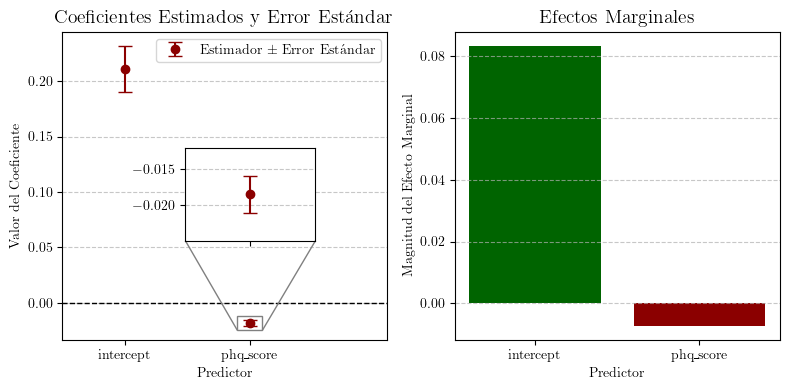

In [ ]:
# 2. Crear la figura con dos subplots uno al lado del otro.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# --- Gráfico 1: Coeficientes y Errores Estándar ---
axes[0].errorbar(
    x=results_p2['Predictor'],
    y=results_p2['Beta_Estimado'],
    yerr=results_p2['se'],
    fmt='o',  # 'o' para mostrar un punto en el valor del estimador
    linestyle='', # No unir los puntos con una línea
    capsize=5, # Añade "tapas" a las barras de error para mejor visibilidad
    label=r'Estimador $\pm$ Error Estándar',
    color='darkred'
)

# Añadir una línea en y=0 para ver fácilmente la significancia
axes[0].axhline(y=0, color='k', linestyle='--', linewidth=1)
axes[0].set_title('Coeficientes Estimados y Error Estándar', fontsize=14)
axes[0].set_ylabel('Valor del Coeficiente')
axes[0].set_xlabel('Predictor')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xlim(-0.5, 2.1)
# --- INICIO DE LA SECCIÓN DE ZOOM ---

# Variable sobre la que quieres hacer zoom
variable_to_zoom = 'phq_score' 

# Encontrar los datos y la posición de esta variable
try:
    # Obtener el índice numérico de la variable en el eje x
    predictors = results_p2['Predictor'].tolist()
    var_index = predictors.index(variable_to_zoom)
    
    # Obtener los datos de esa variable
    zoom_data = results_p2.iloc[var_index]
    beta = zoom_data['Beta_Estimado']
    se = zoom_data['se']
    
    # Crear el 'inset axes' (el gráfico pequeño)
    # Los números [izquierda, abajo, ancho, alto] definen la posición y tamaño del zoom
    axins = inset_axes(axes[0], width="40%", height="30%", loc='lower right',
                       bbox_to_anchor=(-0.2, 0.3, 1, 1),
                       bbox_transform=axes[0].transAxes)

    # Dibujar el mismo error bar plot en el gráfico de inserción
    axins.errorbar(
        x=results_p2['Predictor'],
        y=results_p2['Beta_Estimado'],
        yerr=results_p2['se'],
        fmt='o',
        linestyle='',
        capsize=5,
        color='darkred'
    )
    
    # Definir los límites del zoom para enfocar la variable de interés
    x1, x2 = var_index - 0.1, var_index + 0.1  # Límites en X para centrar la variable
    y1, y2 = beta - 2.5 * se, beta + 2.5 * se  # Límites en Y para ver el estimador y su error
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    
    # Ocultar las etiquetas del eje x del inset para no saturar
    axins.set_xticklabels([])
    axins.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Dibujar las líneas que conectan el área de zoom con el inset
    mark_inset(axes[0], axins, loc1=4, loc2=3, fc="none", ec="0.5")

except (ValueError, IndexError):
    print(f"Advertencia: La variable '{variable_to_zoom}' no se encontró para el zoom.")

# --- FIN DE LA SECCIÓN DE ZOOM ---

# --- Gráfico 2: Efectos Marginales ---
# Filtrar las filas que no tienen efecto marginal (como el intercepto)
df_me = results_p2.dropna(subset=['emarginal']).copy()

# Asignar colores: verde para positivo, rojo para negativo
colors = ['darkgreen' if x > 0 else 'darkred' for x in df_me['emarginal']]
axes[1].bar(
    df_me['Predictor'],
    df_me['emarginal'],
    color=colors
)
axes[1].set_title('Efectos Marginales', fontsize=14)
axes[1].set_ylabel('Magnitud del Efecto Marginal')
axes[1].set_xlabel('Predictor')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=0)

fig.savefig('../figures/p1.png', dpi=300,  bbox_inches='tight')

# Ajustar el layout para que todo quepa correctamente y mostrar el gráfico
plt.tight_layout()
plt.show()


In [142]:
maxll = float(train_logs['MaxL'].values[0])
niter = train_logs['iterations'].values[0]
print('Min likelihood: {:.2f}\nConvergencia: {} iteraciones'.format(maxll, niter))

Min likelihood: -5822.57
Convergencia: 4 iteraciones


### Pregunta 2

In [190]:
path_2 = '../results/problema_2/'
f_values = pd.read_csv(os.path.join(path_2, 'f_values.csv'))
results_p2    = pd.read_csv(os.path.join(path_2, 'results.csv'))
results_p2.sample()

,Predictor,Beta_Estimado,Beta_Estimado_2sls,se,se_2sls
18,"estadocivil_Separado (casado legalmente, pero ...",-0.045515,0.358653,0.03694,0.039833


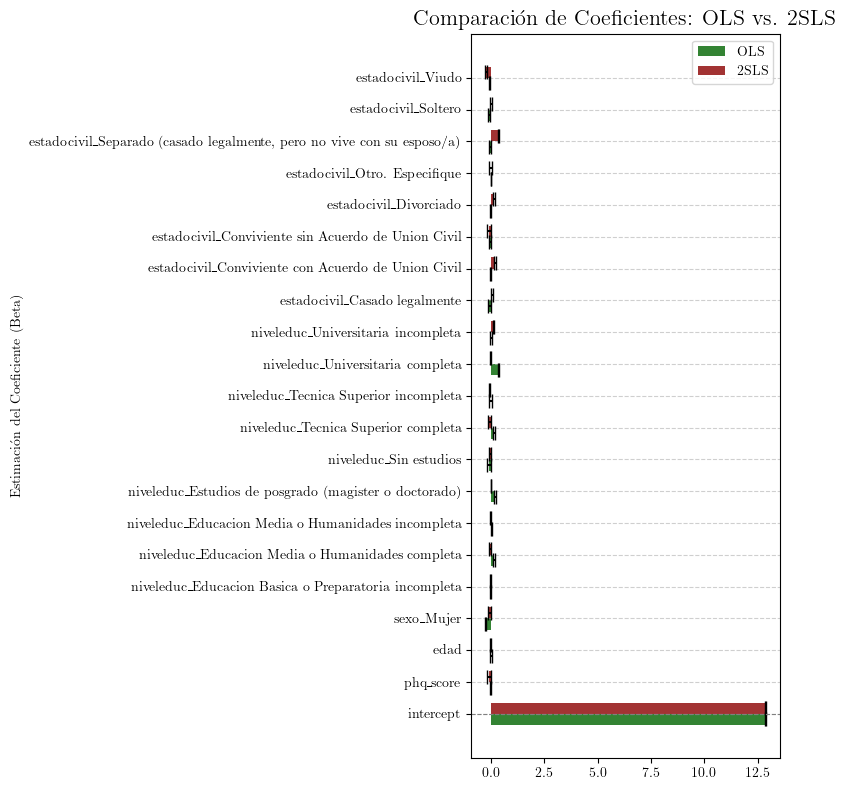

In [204]:
fig, ax = plt.subplots(figsize=(8, 8))

# Definir las posiciones y el ancho de las barras
predictors = results_p2['Predictor']
x = np.arange(len(predictors))  # las localizaciones de las etiquetas
width = 0.35  # el ancho de las barras

# Crear las barras para OLS
rects1 = ax.barh(x - width/2, results_p2['Beta_Estimado'], width, label='OLS', 
                xerr=results_p2['se'], capsize=5, color='darkgreen', alpha=0.8)

# Crear las barras para 2SLS
rects2 = ax.barh(x + width/2, results_p2['Beta_Estimado_2sls'], width, label='2SLS', 
                xerr=results_p2['se_2sls'], capsize=5, color='darkred', alpha=0.8)

# --- 4. Añadir Títulos, Etiquetas y Leyenda ---

ax.set_ylabel('Estimación del Coeficiente (Beta)')
ax.set_title('Comparación de Coeficientes: OLS vs. 2SLS', fontsize=16)
ax.set_yticks(x)
ax.set_yticklabels(predictors, rotation=0, ha="right")
ax.legend()

# Añadir una línea de referencia en y=0
ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')
ax.grid(axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()

### Problema 3

In [ ]:
paths = glob(os.path.join('../results/', 'problema_3*'))

['../results\\problema_3',
 '../results\\problema_3_normalized',
 '../results\\problema_3_no_sexo',
 '../results\\problema_3_no_sexo_normalized',
 '../results\\problema_3_with_nan',
 '../results\\problema_3_with_nan_normalized']

In [70]:
paths = ['../results\\problema_3', '../results\\problema_3_with_nan', '../results\\problema_3_no_sexo',]

{'model_type': 'within', 'vars': {'dependent': 'ingresomensual', 'independent': ['phq_score', 'edad', 'sexo_Mujer', 'niveleduc_Educacion Basica o Preparatoria incompleta', 'niveleduc_Educacion Media o Humanidades completa', 'niveleduc_Educacion Media o Humanidades incompleta', 'niveleduc_Estudios de posgrado (magister o doctorado)', 'niveleduc_Sin estudios', 'niveleduc_Tecnica Superior completa', 'niveleduc_Tecnica Superior incompleta', 'niveleduc_Universitaria completa', 'niveleduc_Universitaria incompleta', 'estadocivil_Casado legalmente', 'estadocivil_Conviviente con Acuerdo de Union Civil', 'estadocivil_Conviviente sin Acuerdo de Union Civil', 'estadocivil_Divorciado', 'estadocivil_Otro. Especifique', 'estadocivil_Separado (casado legalmente, pero no vive con su esposo/a)', 'estadocivil_Soltero', 'estadocivil_Viudo'], 'instrumental': [], 'control': []}, 'on_missing': 'delete', 'path': 'problema_3', 'robust': 'true', 'log_y': 'true', 'normalize_x': 'false', 'normalize_z': 'false', '

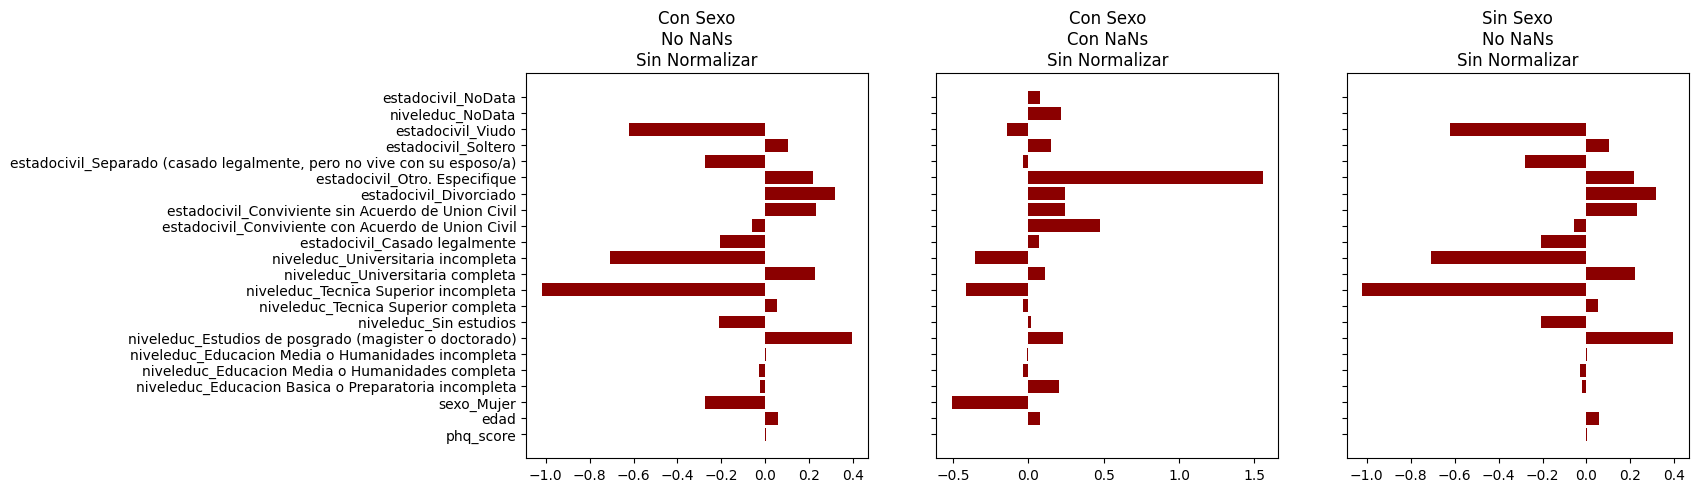

In [90]:
fig, axes = plt.subplots(1, len(paths), sharey=True, figsize=(15, 5))
for index, path in enumerate(paths):
    results_df = pd.read_csv(os.path.join(path, 'results.csv'))

    file_path = os.path.join(path, 'config.json')
    with open(file_path, 'r', encoding='utf-8') as f:
        # La función json.load() lee el archivo y lo convierte en un diccionario de Python
        config_data = json.load(f)
        print(config_data)

        if 'sexo_Mujer' in config_data['vars']['independent']:
            title='Con Sexo'
        else:
            title='Sin Sexo'

        if config_data['on_missing'] == 'delete':
            title+='\nNo NaNs'
        else:
            title+='\nCon NaNs'

        if config_data['normalize_x'] == 'false':
            title+='\nSin Normalizar'

    axes[index].barh(results_df['Predictor'], results_df['Beta_Estimado'], color='darkred')
    axes[index].set_title(title)
fig.savefig('../figures/p3_comp_nonorm.png', dpi=300,  bbox_inches='tight')



In [72]:
paths

['../results\\problema_3',
 '../results\\problema_3_with_nan',
 '../results\\problema_3_no_sexo']

In [73]:
paths_2 = ['../results\\problema_3_normalized',
 '../results\\problema_3_no_sexo_normalized',
 '../results\\problema_3_with_nan_normalized']

In [75]:
import json

{'model_type': 'within', 'vars': {'dependent': 'ingresomensual', 'independent': ['phq_score', 'edad', 'sexo_Mujer', 'niveleduc_Educacion Basica o Preparatoria incompleta', 'niveleduc_Educacion Media o Humanidades completa', 'niveleduc_Educacion Media o Humanidades incompleta', 'niveleduc_Estudios de posgrado (magister o doctorado)', 'niveleduc_Sin estudios', 'niveleduc_Tecnica Superior completa', 'niveleduc_Tecnica Superior incompleta', 'niveleduc_Universitaria completa', 'niveleduc_Universitaria incompleta', 'estadocivil_Casado legalmente', 'estadocivil_Conviviente con Acuerdo de Union Civil', 'estadocivil_Conviviente sin Acuerdo de Union Civil', 'estadocivil_Divorciado', 'estadocivil_Otro. Especifique', 'estadocivil_Separado (casado legalmente, pero no vive con su esposo/a)', 'estadocivil_Soltero', 'estadocivil_Viudo'], 'instrumental': [], 'control': []}, 'on_missing': 'delete', 'path': 'problema_3_normalized', 'robust': 'true', 'log_y': 'true', 'normalize_x': 'true', 'normalize_z': 

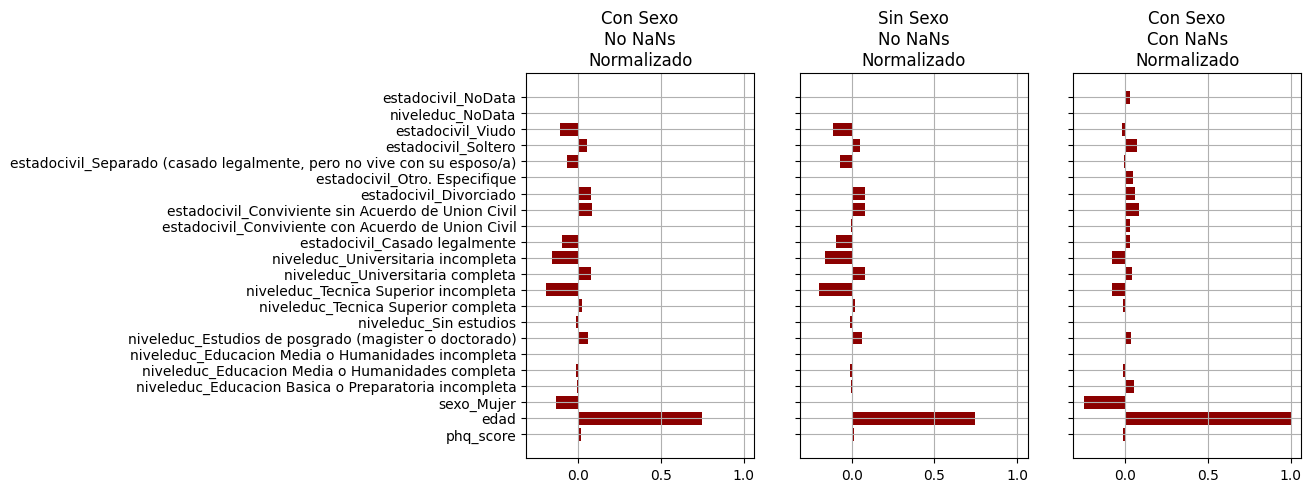

In [96]:
fig, axes = plt.subplots(1, len(paths_2), sharey=True,sharex=True, figsize=(10, 5))
for index, path in enumerate(paths_2):
    results_df = pd.read_csv(os.path.join(path, 'results.csv'))

    file_path = os.path.join(path, 'config.json')
    with open(file_path, 'r', encoding='utf-8') as f:
        # La función json.load() lee el archivo y lo convierte en un diccionario de Python
        config_data = json.load(f)
        print(config_data)

        if 'sexo_Mujer' in config_data['vars']['independent']:
            title='Con Sexo'
        else:
            title='Sin Sexo'

        if config_data['on_missing'] == 'delete':
            title+='\nNo NaNs'
        else:
            title+='\nCon NaNs'

        if config_data['normalize_x'] == 'true':
            title+='\nNormalizado'

    # results_df = results_df.sort_values('Beta_Estimado', ascending=False)
    axes[index].barh(results_df['Predictor'], results_df['Beta_Estimado'], color='darkred')
    axes[index].set_title(title)
fig.savefig('../figures/p3_comp_norm.png', dpi=300,  bbox_inches='tight')
